In [2]:
# pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness.head(15)

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0   Afghanistan         South Asia  2008     3.723590            7.350416   
1   Afghanistan         South Asia  2009     4.401778            7.508646   
2   Afghanistan         South Asia  2010     4.758381            7.613900   
3   Afghanistan         South Asia  2011     3.831719            7.581259   
4   Afghanistan         South Asia  2012     3.782938            7.660506   
5   Afghanistan         South Asia  2013     3.572100            7.680333   
6   Afghanistan         South Asia  2014     3.130896            7.670638   
7   Afghanistan         South Asia  2015     3.982855            7.653833   
8   Afghanistan         South Asia  2016     4.220169            7.650370   
9   Afghanistan         South Asia  2017     2.661718            7.647830   
10  Afghanistan         South Asia  2018     2.694303            7.630801   
11  Afghanistan         South Asia  2019     2.375092            7.640086   
12  Afghanistan         South Asia  2021     2.436034            7.324032   
13  Afghanistan         South Asia  2022     1.281271                 NaN   
14  Afghanistan         South Asia  2023     1.859000            7.324000   

    Social Support  Healthy Life Expectancy At Birth  \
0         0.450662                         50.500000   
1         0.552308                         50.799999   
2         0.539075                         51.099998   
3         0.521104                         51.400002   
4         0.520637                         51.700001   
5         0.483552                         52.000000   
6         0.525568                         52.299999   
7         0.528597                         52.599998   
8         0.559072                         52.924999   
9         0.490880                         53.250000   
10        0.507516                         53.575001   
11        0.419973                         53.900002   
12        0.454175                         54.549999   
13        0.228217                         54.875000   
14        0.341000                         54.712000   

    Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                       0.718114    0.167652                   0.881686   
1                       0.678896    0.190809                   0.850035   
2                       0.600127    0.121316                   0.706766   
3                       0.495901    0.163571                   0.731109   
4                       0.530935    0.237588                   0.775620   
5                       0.577955    0.062666                   0.823204   
6                       0.508514    0.105755                   0.871242   
7                       0.388928    0.081652                   0.880638   
8                       0.522566    0.043916                   0.793246   
9                       0.427011   -0.119410                   0.954393   
10                      0.373536   -0.091106                   0.927606   
11                      0.393656   -0.106016                   0.923849   
12                      0.394306   -0.081011                   0.946299   
13                      0.368377         NaN                   0.733198   
14                      0.382000   -0.081000                   0.847000   

    Positive Affect  Negative Affect  Confidence In National Government  
0          0.414297         0.258195                           0.612072  
1          0.481421         0.237092                           0.611545  
2          0.516907         0.275324                           0.299357  
3          0.479835         0.267175                           0.307386  
4          0.613513         0.267919                           0.435440  
5          0.547417         0.273328                           0.482847  
6          0.491641         0.374861                           0.409048  
7          0.491410         0.339276                           0.260557  
8     

In [4]:
happiness.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [5]:
happiness.shape

(2336, 13)

In [6]:
# Summary stats
print(happiness.describe())

              Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  2336.000000  2336.000000         2316.000000     2323.000000   
mean   2014.679795     5.482778            9.393317        0.809995   
std       5.027398     1.126222            1.156462        0.121457   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2011.000000     4.646820            8.502017        0.744791   
50%    2015.000000     5.439057            9.502519        0.835509   
75%    2019.000000     6.314347           10.380333        0.904686   
max    2023.000000     8.018934           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       2281.000000                   2303.000000   
mean                          63.394335                      0.750210   
std                            6.848311                      0.138948   
min                            6.720000                      0.25753

In [7]:
# This may have been moved to the wrong position in our code. Revisit.
numerical_cols = ['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth',
                  'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 
                  'Positive Affect', 'Negative Affect', 'Confidence In National Government']

# Using median for inputation
for col in numerical_cols:
    happiness[col].fillna(happiness[col].median(), inplace=True)

#### Brainstorming ways to separate the data:

#### coverting life ladder score to percentile in groups of 10
#### then plot based on year
#### x would always be the year
#### then plot other factors

### OR break up by regional indicator


# Regional Grouping and Plotting [Year, Life Ladder, Region]

In [8]:
# Convert 'Year' column to int (although it already is? will change later)
happiness['Year'] = happiness['Year'].astype(int)

In [9]:
# Group the data by 'Regional Indicator'
grouped_by_region = happiness.groupby('Regional Indicator')

In [10]:
# Calculate the mean for each numerical column in each group
mean_values = grouped_by_region.mean()

# For a specific column, e.g., 'Life Ladder'
life_ladder_mean = grouped_by_region['Life Ladder'].mean()

TypeError: Could not convert AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBosnia and HerzegovinaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaNorth MacedoniaPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSlovenia to numeric

In [ ]:
# Standardize 'Life Ladder' scores within each region
standardized_life_ladder = grouped_by_region['Life Ladder'].transform(lambda x: (x - x.mean()) / x.std())


In [ ]:
# Keep groups with a mean 'Life Ladder' score above a certain threshold
filtered_groups = grouped_by_region.filter(lambda x: x['Life Ladder'].mean() > some_threshold)


In [ ]:
# Calculate the mean 'Life Ladder' for each region
mean_life_ladder_by_region = happiness.groupby('Regional Indicator')['Life Ladder'].mean()

# Plotting
mean_life_ladder_by_region.plot(kind='bar', figsize=(10, 6), title='Average Life Ladder Score by Region')
plt.ylabel('Average Life Ladder Score')
plt.show()


In [ ]:
# plotting using sns
sns.pairplot(data=grouping_by_region, hue="species")

In [ ]:
# Plotting each group separately

plt.figure(figsize=(12, 8))
for name, group in grouping_by_region:
    plt.plot(group['Year'], group['Life Ladder'], label=name)

plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.title('Life Ladder by Region 2005-2023')
plt.legend(title='Region')
plt.grid(True)
plt.show()

### Getting The Mean Life Ladder For Each Region

In [12]:
# Useful for this type of interactive plot
import plotly.graph_objects as go

In [13]:
# Converting 'Year' to int again (just in case)
happiness['Year'] = happiness['Year'].astype(int)

In [14]:
# Group data by 'Region' and calculate the average 'Life Ladder' for each region
grouped = happiness.groupby('Regional Indicator').agg({'Life Ladder': 'mean'}).reset_index()

In [15]:
# Create an empty figure
fig = go.Figure()

In [16]:
# Plot each region separately
for i, row in grouped.iterrows():
    fig.add_trace(go.Scatter(x=happiness[happiness['Regional Indicator'] == row['Regional Indicator']]['Year'],
                             y=happiness[happiness['Regional Indicator'] == row['Regional Indicator']]['Life Ladder'],
                             mode='lines',
                             name=row['Regional Indicator']))

In [17]:
# update_layout to help with plotting
fig.update_layout(
    title='Average Life Ladder by Region (2005-2023)',
    xaxis_title='Year',
    yaxis_title='Average Life Ladder',
    hovermode='closest',
    legend_title='Region'
)

# Show the ~interactive~ plot
fig.show()

### Adjusting The Above Data Grouping Plot

In [18]:
# Convert 'Year' column to int
happiness['Year'] = happiness['Year'].astype(int)

In [19]:
# Handle missing values
happiness.dropna(subset=['Life Ladder'], inplace=True)

In [20]:
# Group data by 'Region' and calculate the average 'Life Ladder' for each region
grouped = happiness.groupby('Regional Indicator')['Life Ladder'].mean().reset_index()

In [21]:
# Create an empty figure
fig = go.Figure()

In [22]:
# Plot each region separately
for i, row in grouped.iterrows():
    fig.add_trace(go.Scatter(x=happiness[happiness['Regional Indicator'] == row['Regional Indicator']]['Year'],
                             y=happiness[happiness['Regional Indicator'] == row['Regional Indicator']]['Life Ladder'],
                             mode='lines',
                             name=row['Regional Indicator']))

In [23]:
# update_layout to help with plotting
fig.update_layout(
    title='Average Life Ladder by Region (2005-2023)',
    xaxis_title='Year',
    yaxis_title='Average Life Ladder',
    hovermode='closest',
    legend_title='Region'
)

In [24]:
# Show the ~interactive~ plot
fig.show()

### More Plot Adjustments

In [25]:
import plotly.graph_objects as go


In [26]:
# Convert 'Year' column to int (it is already int, but trying to get (ex.2005.5) to go away)
happiness['Year'] = happiness['Year'].astype(int)

In [27]:
# Handle our missing values
happiness.dropna(subset=['Life Ladder'], inplace=True)

In [28]:
# Group the data by 'Year' and 'Region' and obtain average 'Life Ladder' (per region) 
region_grouped_interactive = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().reset_index()

In [29]:
# Plotting (create fig)
fig = go.Figure()

In [30]:
# Iterate over each region and plot the average life ladder
for region in region_grouped_interactive['Regional Indicator'].unique():
    region_data = region_grouped_interactive[region_grouped_interactive['Regional Indicator'] == region]
    fig.add_trace(go.Scatter(x=region_data['Year'], y=region_data['Life Ladder'], mode='lines', name=region))

In [31]:
# Configure plot layout
fig.update_layout(
    title='Average Life Ladder by Region',
    xaxis_title='Year',
    yaxis_title='Average Life Ladder by Region',
    hovermode='closest',
    legend_title='Region'
)

fig.show()

### More Plot Adjustments

In [32]:
import plotly.graph_objects as go

In [33]:
# Convert 'Year' column to int
happiness['Year'] = happiness['Year'].astype(int)

In [34]:
# Handle missing values
happiness.dropna(subset=['Life Ladder'], inplace=True)

In [35]:
# Grouping the data 
grouped = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().reset_index()

In [36]:
# Plotting
fig = go.Figure()

In [37]:
# Set colors for each region
colors = {
    'Central and Eastern Europe': 'rgb(31, 119, 180)',
    'Commonwealth of Independent States': 'rgb(255, 127, 14)',
    'East Asia': 'rgb(44, 160, 44)',
    'Latin America and Caribbean': 'rgb(214, 39, 40)',
    'Middle East and North Africa': 'rgb(148, 103, 189)',
    'North America and ANZ': 'rgb(140, 86, 75)',
    'South Asia': 'rgb(227, 119, 194)',
    'Southeast Asia': 'rgb(127, 127, 127)',
    'Sub-Saharan Africa': 'rgb(188, 189, 34)',
    'Western Europe': 'rgb(23, 190, 207)'  
}

In [38]:
# Iterate over each region and plot the average life ladder
for region in grouped['Regional Indicator'].unique():
    region_data = grouped[grouped['Regional Indicator'] == region]
    fig.add_trace(go.Scatter(x=region_data['Year'], y=region_data['Life Ladder'], mode='lines',
                             name=region, line=dict(color=colors[region])))

In [39]:
# Update layout
fig.update_layout(
    title='Average Life Ladder by Region over the Years',
    xaxis_title='Year',
    yaxis_title='Average Life Ladder',
    hovermode='closest',
    legend_title='Region',
#   white background:
    template='plotly_white'  
)
fig.show()

### More Plot Adjustments

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
# Convert 'Year' column to int
happiness['Year'] = happiness['Year'].astype(int)

In [42]:
# Handle missing values
happiness.dropna(subset=['Life Ladder'], inplace=True)

In [43]:
# Group the data by 'Year' and 'Region' and calculate the average 'Life Ladder' for each combination
grouped = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().reset_index()

In [44]:
# Define custom colors for each region
custom_colors = {
    'Central and Eastern Europe': 'rgb(31, 119, 180)',
    'Commonwealth of Independent States': 'rgb(255, 127, 14)',
    'East Asia': 'rgb(44, 160, 44)',
    'Latin America and Caribbean': 'rgb(214, 39, 40)',
    'Middle East and North Africa': 'rgb(148, 103, 189)',
    'North America and ANZ': 'rgb(140, 86, 75)',
    'South Asia': 'rgb(227, 119, 194)',
    'Southeast Asia': 'rgb(127, 127, 127)',
    'Sub-Saharan Africa': 'rgb(188, 189, 34)',
    'Western Europe': 'rgb(23, 190, 207)'
}

In [45]:
# Create subplots
fig = make_subplots(rows=1, cols=1)

In [46]:
# Iterate over each region and add a trace for the average life ladder with custom color
for region in grouped['Regional Indicator'].unique():
    region_data = grouped[grouped['Regional Indicator'] == region]
    fig.add_trace(go.Scatter(x=region_data['Year'], y=region_data['Life Ladder'], mode='lines',
                              name=region, line=dict(color=custom_colors[region])), row=1, col=1)

In [47]:
# Update layout
fig.update_layout(
    title='Average Life Ladder by Region over the Years',
    xaxis_title='Year',
    yaxis_title='Average Life Ladder',
    legend_title='Region',
    template='plotly_white'  # Use a white background template
)
fig.show()

### Last of the Plot Adjustments for our Regional Analysis (Non-Interactive)

In [48]:
# Convert 'Year' column to int
happiness['Year'] = happiness['Year'].astype(int)

In [49]:
# Handle missing values
happiness.dropna(subset=['Life Ladder'], inplace=True)

In [50]:
# Group the data by 'Year' and 'Region' and calculate the average 'Life Ladder' for each combination
grouped = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().reset_index()

In [51]:
# Define custom colors for each region
custom_colors = {
    'Central and Eastern Europe': 'tab:blue',
    'Commonwealth of Independent States': 'tab:orange',
    'East Asia': 'tab:green',
    'Latin America and Caribbean': 'tab:red',
    'Middle East and North Africa': 'tab:purple',
    'North America and ANZ': 'tab:brown',
    'South Asia': 'tab:pink',
    'Southeast Asia': 'tab:gray',
    'Sub-Saharan Africa': 'tab:olive',
    'Western Europe': 'tab:cyan'  # Add color for Western Europe
}

In [52]:
# Create new figure
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

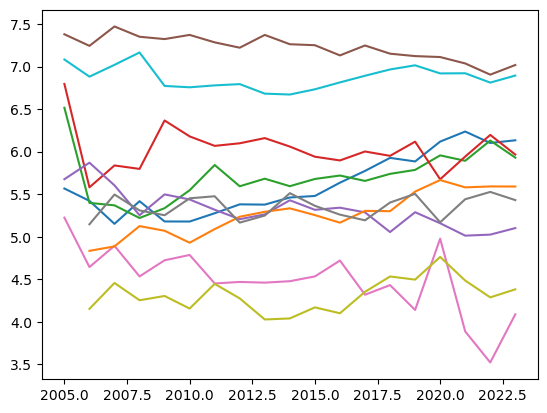

In [53]:
# Iterate over each region and plot the average life ladder with custom color
for region in grouped['Regional Indicator'].unique():
    region_data = grouped[grouped['Regional Indicator'] == region]
    plt.plot(region_data['Year'], region_data['Life Ladder'], label=region, color=custom_colors[region])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


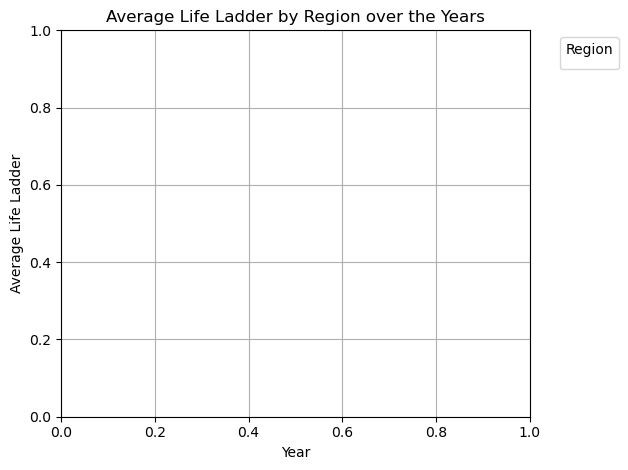

In [54]:
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Life Ladder')
plt.title('Average Life Ladder by Region over the Years')

# Add legend with custom colors
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Exploring our data a little more (columns)

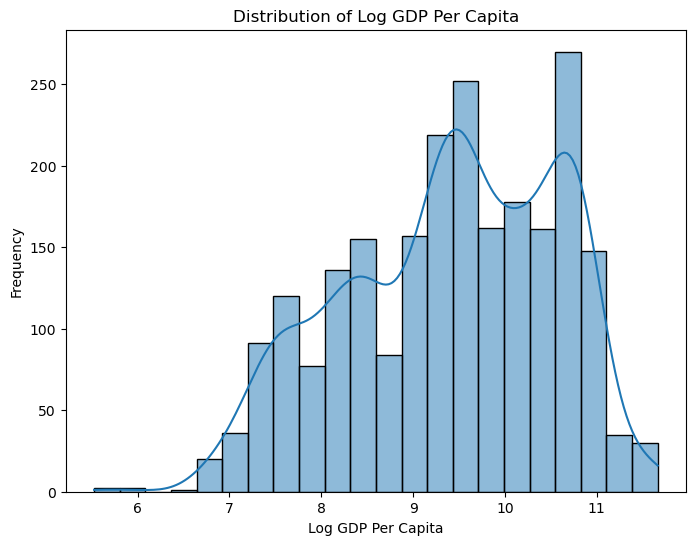

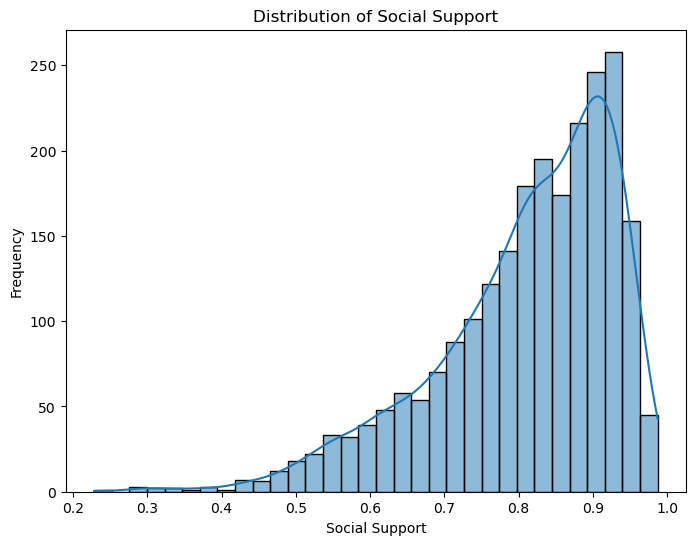

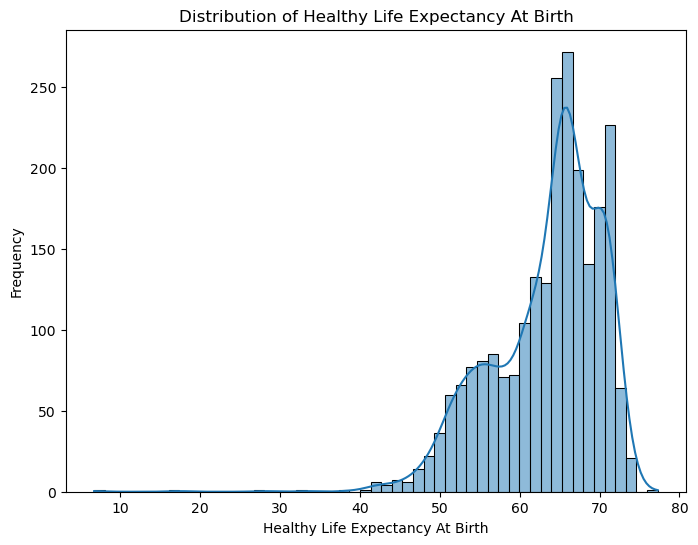

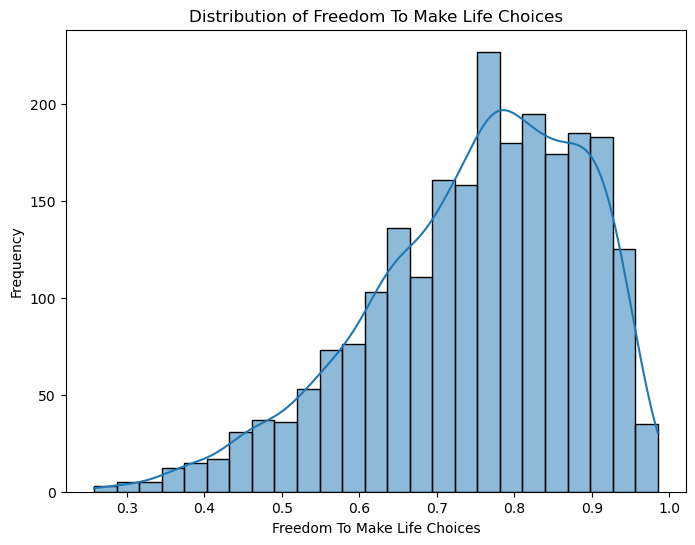

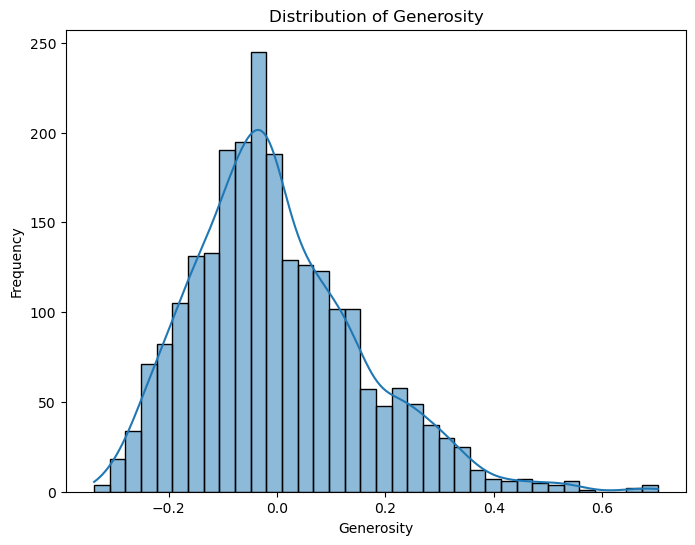

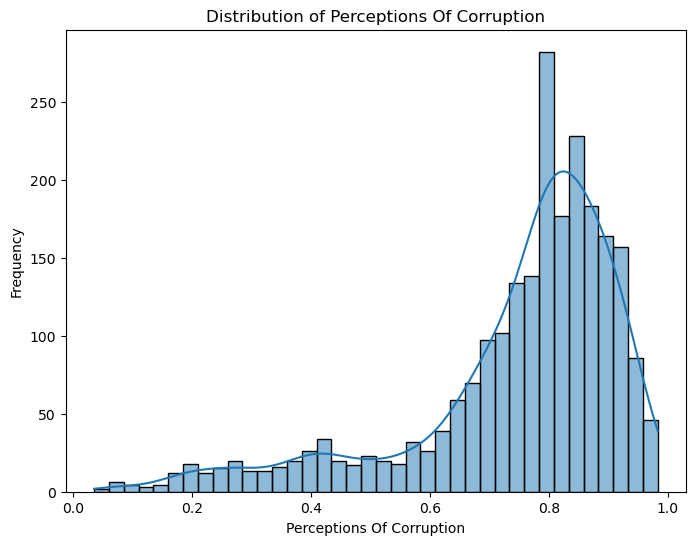

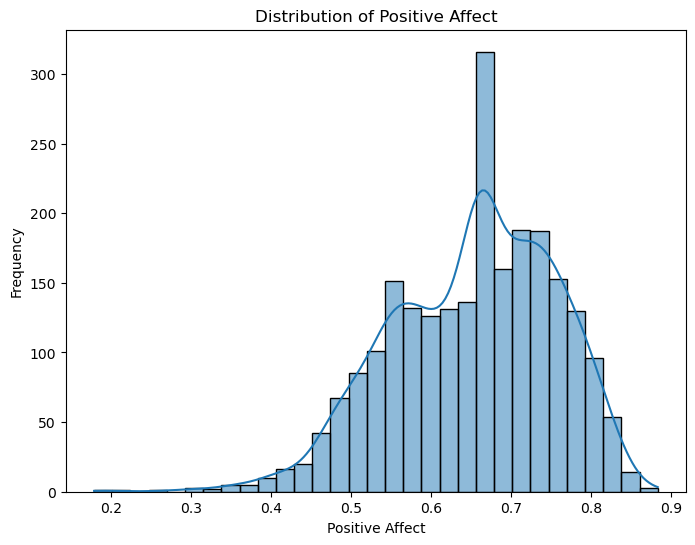

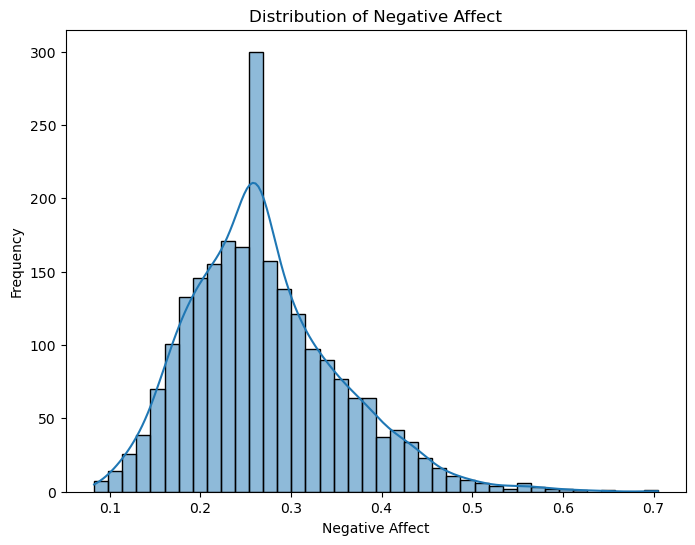

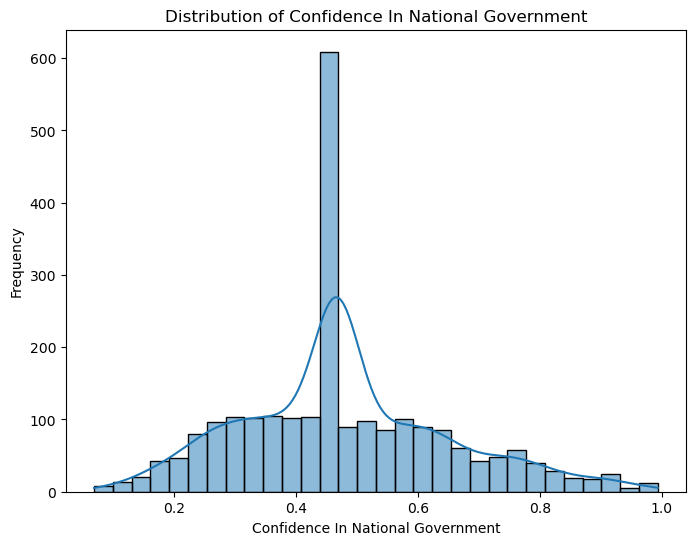

In [55]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(happiness[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Some Box Plots

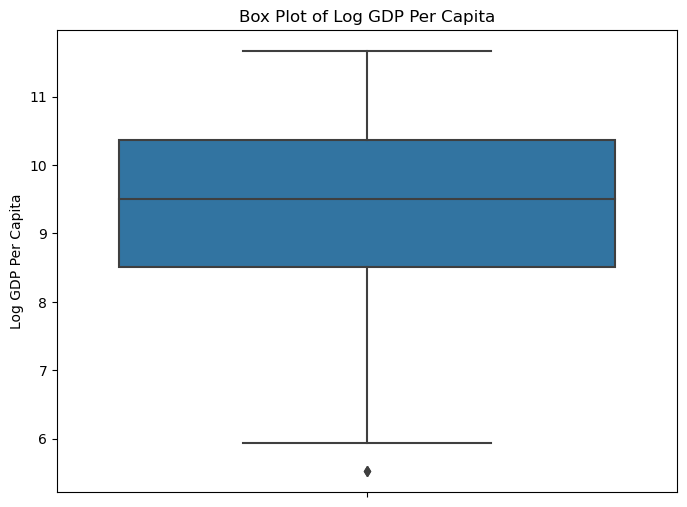

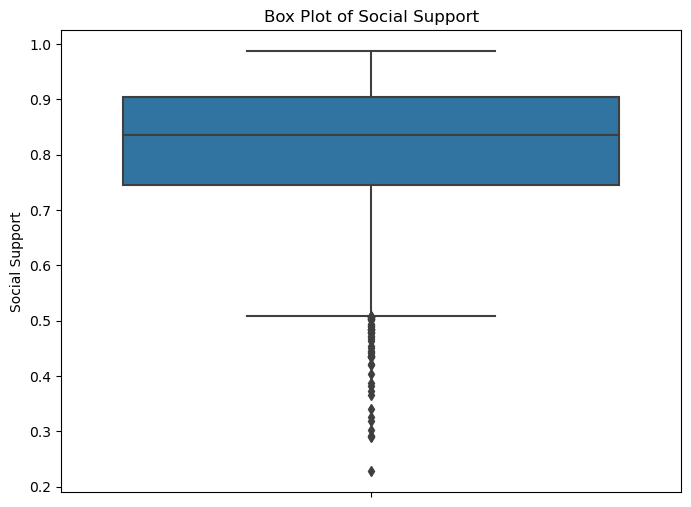

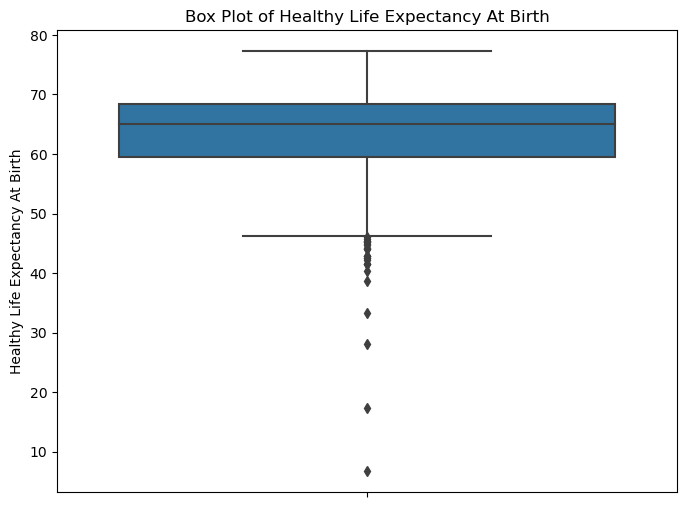

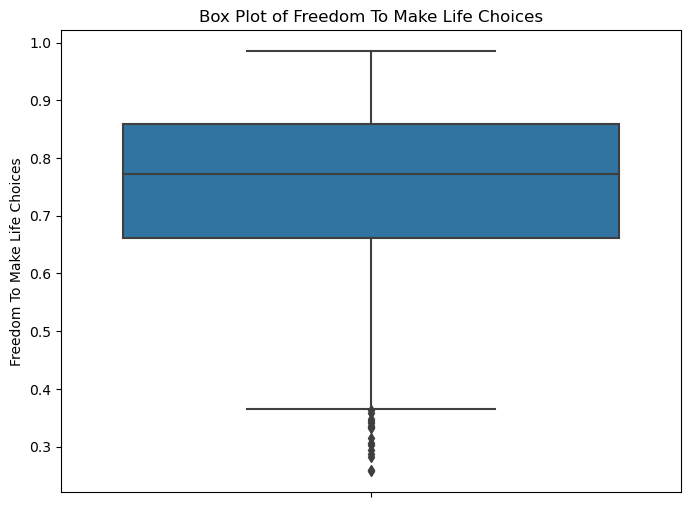

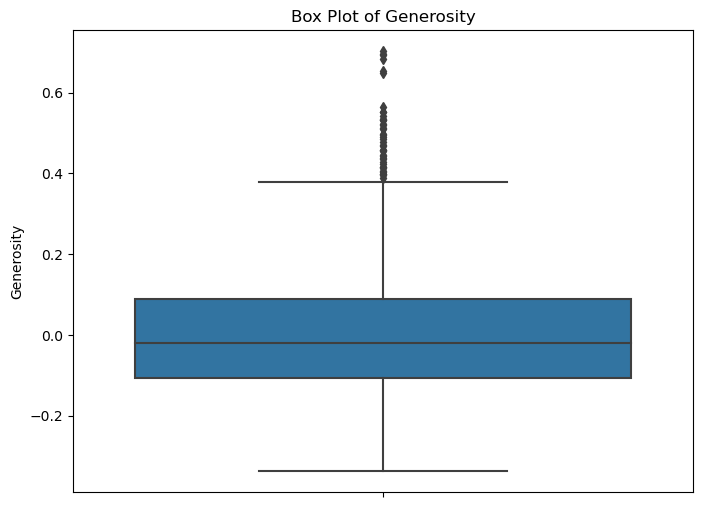

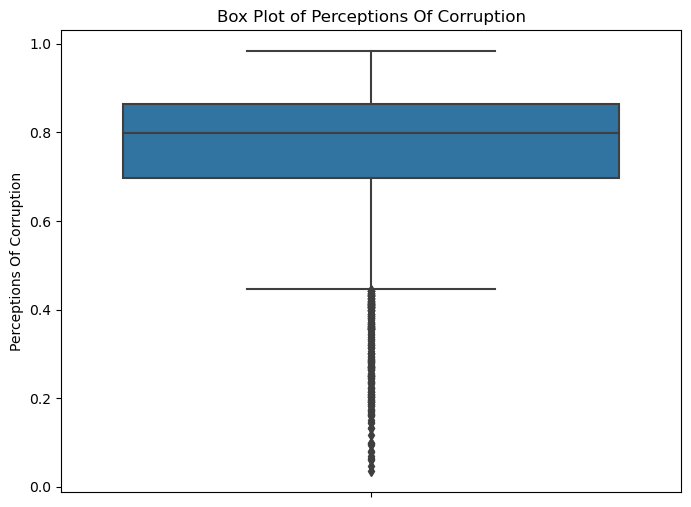

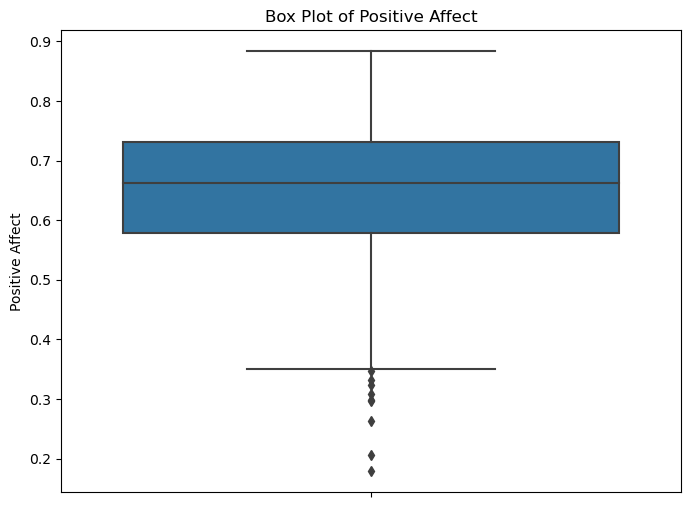

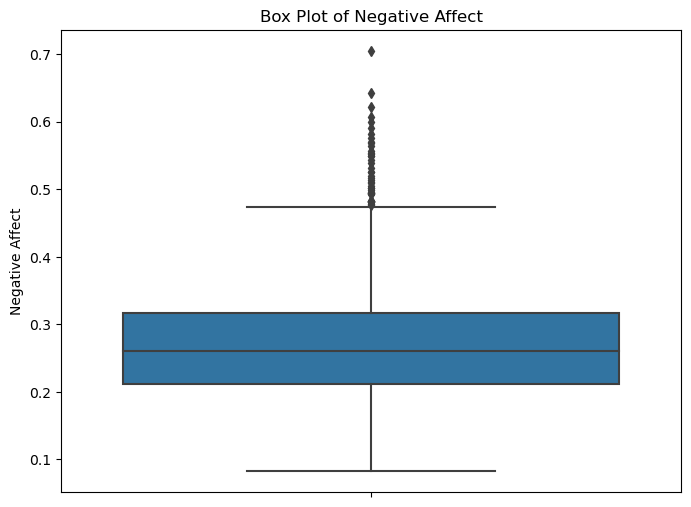

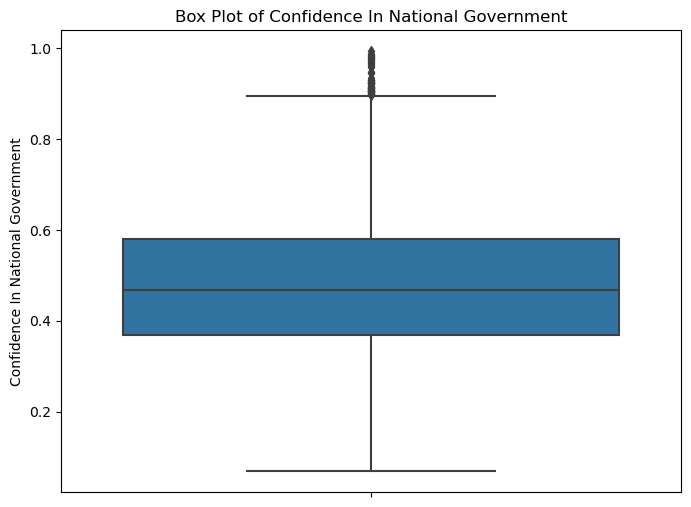

In [56]:
# Box plotting
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=happiness[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

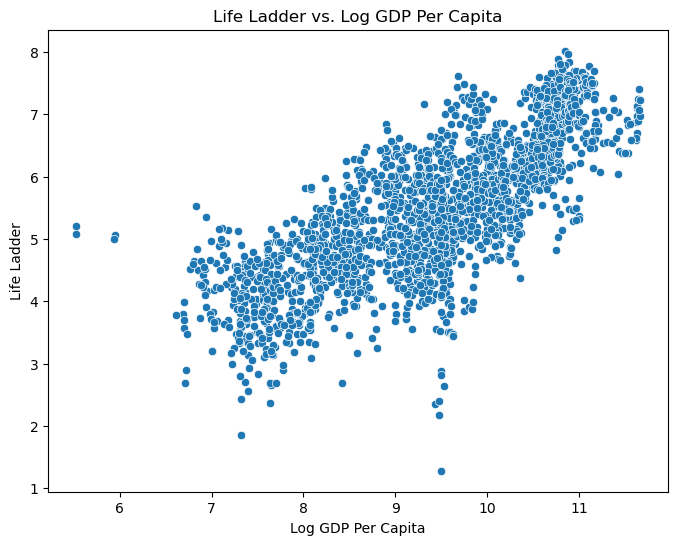

In [57]:
# Scatter plots (for bivariate analysis)
# Example: Life Ladder vs. Log GDP Per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP Per Capita', y='Life Ladder', data=happiness)
plt.title('Life Ladder vs. Log GDP Per Capita')
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Life Ladder')
plt.show()

# Original grouping of every country to plot

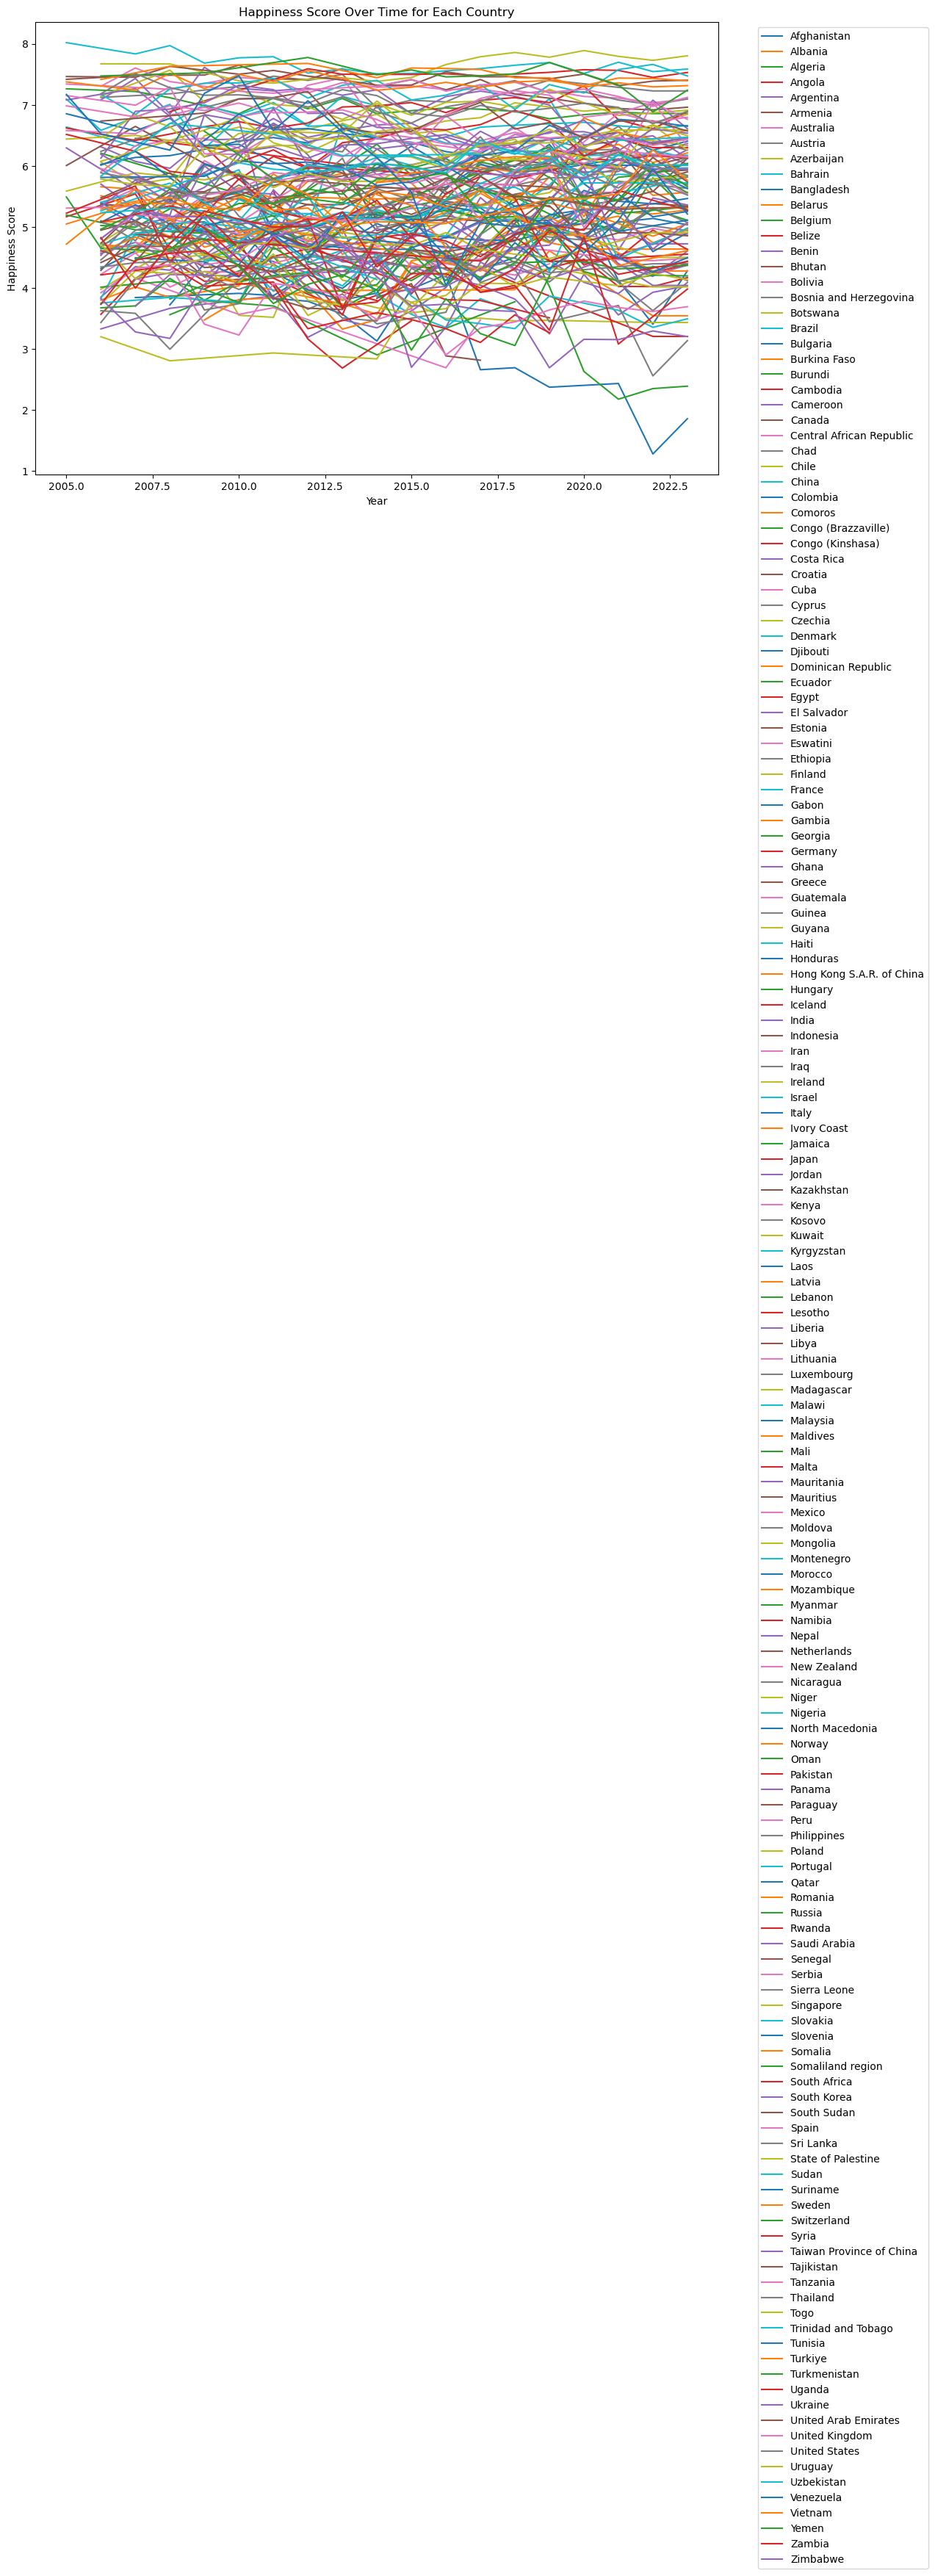

In [58]:
grouped_by_country = happiness.groupby('Country Name')

# Plotting each country's time series
plt.ion()
plt.figure(figsize=(12, 8))
for country, data in grouped_by_country:
    plt.plot(data['Year'], data['Life Ladder'], label=country)

plt.title('Happiness Score Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Grouping By Country (Interactive)

In [59]:
import plotly.graph_objects as go

In [60]:
# Grouping data by country
grouped_by_country = happiness.groupby('Country Name')

In [61]:
# Creating traces for each country
traces = []
for country, data in grouped_by_country:
    trace = go.Scatter(x=data['Year'], y=data['Life Ladder'], mode='lines', name=country)
    traces.append(trace)

In [62]:
# Creating layout for this interactive plot
layout = go.Layout(
    title='Happiness Score Over Time for Each Country',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Happiness Score'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

## Trying out some models (rough)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
# Set X and y
X = happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 
               'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 
               'Confidence In National Government']]
y = happiness['Life Ladder']

In [65]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Choose a model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions
y_pred = model.predict(X_test)

In [68]:
# Calculate accuracy score
accuracy = r2_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.7228128049136461


### Random Forest (rough)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
X = happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']]
y = happiness['Life Ladder']

In [71]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
# Predictions
y_pred = rf_model.predict(X_test)

In [74]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score:", r2)
print("Mean Squared Error:", mse)

R-squared score: 0.8531237855447802
Mean Squared Error: 0.1736536043903277


#### SUZANNA'S ADVICE:

#### instead of correlation, USE VIF. 
#### When VIF is greater than 10 drop the variable

## Attempt at graphing these predictions

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [76]:
# Set our X and y
X = happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 
               'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 
               'Positive Affect', 'Negative Affect', 'Confidence In National Government']]
y = happiness['Life Ladder']

In [77]:
# Drop the target variable from features
# X = X.drop('Life Ladder')

In [78]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [79]:
# Convert the imputed array back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

In [80]:
# Polynomial features. degree=2
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_imputed_df)

In [81]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [82]:
# RF model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [84]:
# Calculate eval.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score:", r2)
print("Mean Squared Error:", mse)

R-squared score: 0.8580805154585913
Mean Squared Error: 0.16779319997620726


### Trying to plot Actual vs. Predicted Values

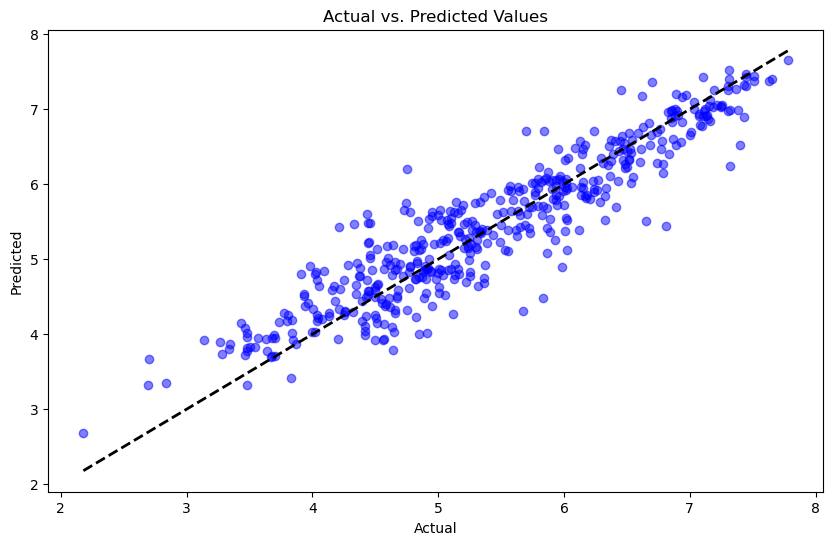

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

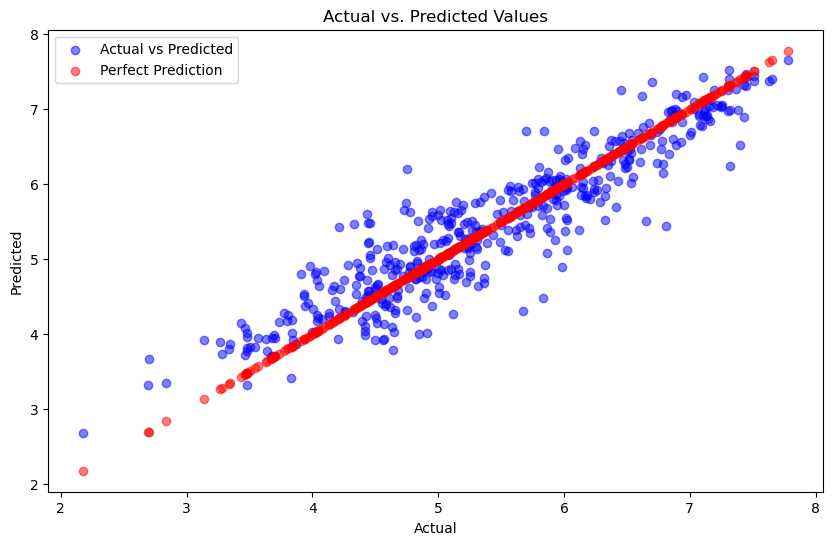

In [86]:
# Exploring a "perfect prediction"
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Perfect Prediction', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

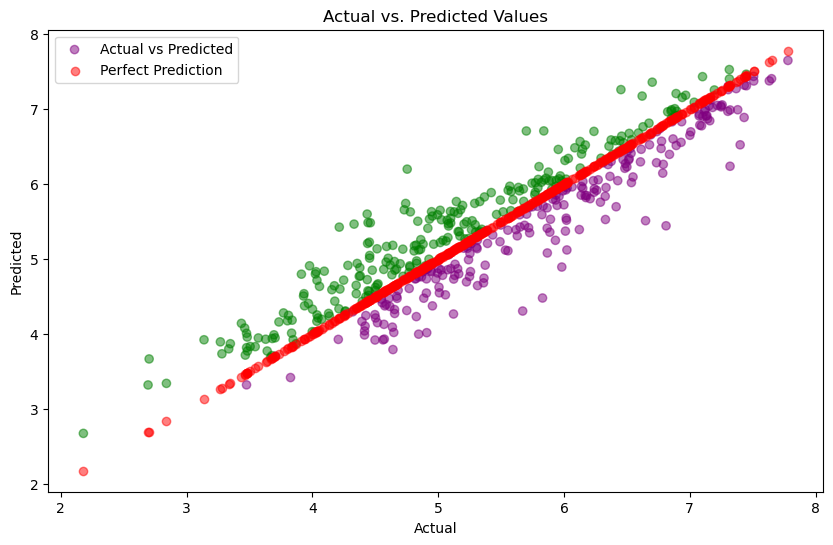

In [87]:
# ATTEMPT** Color coding based on whether predicted values are higher or lower than actual values
colors = ['green' if pred > actual else 'purple' for pred, actual in zip(y_pred, y_test)]


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color=colors, label='Actual vs Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='red', label='Perfect Prediction', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()